In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pickle
import pandas as pd
import numpy as np

In [4]:
with open('/content/drive/MyDrive/프로젝트/data/KLyricSentenceDFFinal.p', 'rb') as f:
    df = pickle.load(f)

In [5]:
df

,title,artist,lyric,genre
0,내 손을 잡아,아이유,"[느낌이 오잖아, 떨리고 있잖아, 언제까지 눈치만 볼 거니, 네 맘을 말해봐, 딴청...",balad
1,너의 모든 순간 (Original),성시경,"[이윽고 내가 한눈에, 너를 알아봤을 때, 모든 건 분명 달라지고 있었어, 내 세상...",balad
2,Timeless,SG 워너비,"[어쩜 살아가다 보면, 한 번은 날 찾을지 몰라, 난 그 기대 하나로, 오늘도 힘겹...",balad
3,바람이 불었으면 좋겠어,길구봉구,"[웃는 모습이 너무 아름다운, 그런 너를 기억하면서, 괜찮아 넌 잘할거라 말하던, ...",balad
4,봄 사랑 벚꽃 말고,HIGH4 (하이포),"[길었던 겨우내 줄곧 품이 좀 남는, 밤색 코트, 그 속에 나를 쏙 감추고 걸음을,...",balad
...,...,...,...,...
3391,소녀,뮤뭉,"[손만 닿아도 떨어져버릴 것 같은, 꽃잎 같은 모습을 하고 있는 널 보았어, 아 소...",folk
3392,꿈처럼 이내 사라져 버리네,박연두,"[바람은 기억하고 있었고, 바다는 널 품에 안고 있었어, 우리는 늘 그렇듯 살며 잊...",folk
3393,과일가게총각,나날(NaaNaL),"[우리 동네 과일가게에서, 일하는 총각이 좋아, 갈색머리 우렁찬 목소리에, 나는 빠...",folk
3394,Attitude,이보람,"[빼곡히도 적어 놓았던, 알 수 없던 나의 생각들이, 점점 줄어드는 공간이, 마침표...",folk


In [6]:
df_ = pd.DataFrame(df['lyric'], columns = ['lyric'])
df_

,lyric
0,"[느낌이 오잖아, 떨리고 있잖아, 언제까지 눈치만 볼 거니, 네 맘을 말해봐, 딴청..."
1,"[이윽고 내가 한눈에, 너를 알아봤을 때, 모든 건 분명 달라지고 있었어, 내 세상..."
2,"[어쩜 살아가다 보면, 한 번은 날 찾을지 몰라, 난 그 기대 하나로, 오늘도 힘겹..."
3,"[웃는 모습이 너무 아름다운, 그런 너를 기억하면서, 괜찮아 넌 잘할거라 말하던, ..."
4,"[길었던 겨우내 줄곧 품이 좀 남는, 밤색 코트, 그 속에 나를 쏙 감추고 걸음을,..."
...,...
3391,"[손만 닿아도 떨어져버릴 것 같은, 꽃잎 같은 모습을 하고 있는 널 보았어, 아 소..."
3392,"[바람은 기억하고 있었고, 바다는 널 품에 안고 있었어, 우리는 늘 그렇듯 살며 잊..."
3393,"[우리 동네 과일가게에서, 일하는 총각이 좋아, 갈색머리 우렁찬 목소리에, 나는 빠..."
3394,"[빼곡히도 적어 놓았던, 알 수 없던 나의 생각들이, 점점 줄어드는 공간이, 마침표..."


In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
x = df_.iloc[0,0]
x
# 가사를 합치고 없애고 전처리하는 과정에서 index가 엉망이라 걍 iloc로 편하게 쓰자.
# 인덱스 리셋하면 되긴 하는데 귀찮다.

In [ ]:
# 리스트 하나에 문장 스트링을 싹 다 담아주고 fit on texts 해볼까

In [ ]:
stopwords = ['가', '예', '이', '리가', '하', '오']

In [8]:
x_data = []
for i in range(len(df_)):
    x = df_.iloc[i,0]
    for sentence in x:
        x_data.append(sentence)
x_data[0]

'느낌이 오잖아'

In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_data)

In [ ]:
len(tokenizer.word_index)

78219

In [10]:
vocab_size = len(tokenizer.word_index) + 1 # 0 포함 위해

In [ ]:
tokenizer.texts_to_sequences([x_data[0]])[0] # 문장 차원을 높여야 적용됨. vacabulary에 저장된 번호로 단어가 바뀜

[1063, 9416]

In [11]:
sequences = []
for line in x_data:
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)): # 단어 하나인 문장은 제외(문장을 만들기 어려우므로), 
        sequence = encoded[:i+1]
        sequences.append(sequence)
len(sequences)
# 53만여개의 문장 샘플이 나옴..
# ex) 느낌이, 느낌이 오잖아, 떨리고, 떨리고 있잖아, ...

537206

In [ ]:
sequences[0]

[1063, 9416]

In [ ]:
max_len = max(len(l) for l in sequences)
max_len

105

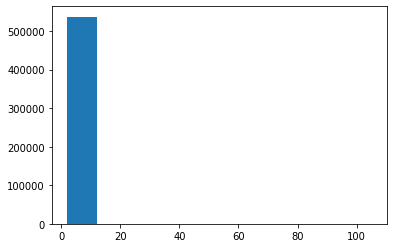

In [ ]:
import matplotlib.pyplot as plt
plt.hist([len(l) for l in sequences])
plt.show()
# 문장의 길이(단어의 개수)가 대부분 10개 정도인듯

In [12]:
sequences = pad_sequences(sequences, maxlen=10, padding='pre')

In [13]:
# 각 샘플 문장의 마지막 단어를 레이블로 분류하기
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

In [ ]:
X

array([[    0,     0,     0, ...,     0,     0,  1063],
       [    0,     0,     0, ...,     0,     0, 16417],
       [    0,     0,     0, ...,     0,     0,  1122],
       ...,
       [    0,     0,     0, ...,    89,     3,  1276],
       [    0,     0,     0, ...,     0,     0,  1019],
       [    0,     0,     0, ...,     0,  1019,  7256]], dtype=int32)

In [14]:
len(y)

537206

In [ ]:
#원핫인코딩. 터져버린다!
y = to_categorical(y, num_classes=vocab_size)
y

In [ ]:
vocab_size

78220

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

In [ ]:
m = Sequential()
m.add(Embedding(vocab_size, 10))
m.add(LSTM(128))
m.add(Dense(vocab_size, activation = 'softmax'))

In [ ]:
m.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
m.fit(X,y, epochs = 10)

Epoch 1/10
16788/16788 [==============================] - 272s 16ms/step - loss: 9.0171 - accuracy: 0.0218
Epoch 2/10
16788/16788 [==============================] - 265s 16ms/step - loss: 8.1454 - accuracy: 0.0506
Epoch 3/10
16788/16788 [==============================] - 264s 16ms/step - loss: 7.5104 - accuracy: 0.0854
Epoch 4/10
16788/16788 [==============================] - 266s 16ms/step - loss: 6.9740 - accuracy: 0.1189
Epoch 5/10
16788/16788 [==============================] - 267s 16ms/step - loss: 6.5208 - accuracy: 0.1482
Epoch 6/10
16788/16788 [==============================] - 265s 16ms/step - loss: 6.1357 - accuracy: 0.1741
Epoch 7/10
16788/16788 [==============================] - 265s 16ms/step - loss: 5.8513 - accuracy: 0.1961
Epoch 8/10
16788/16788 [==============================] - 264s 16ms/step - loss: 5.6202 - accuracy: 0.2143
Epoch 9/10
16788/16788 [==============================] - 268s 16ms/step - loss: 5.4291 - accuracy: 0.2305
Epoch 10/10
16788/16788 [============

In [ ]:
with open('/content/drive/MyDrive/프로젝트/모델/LSTM1.p', 'wb') as f:
    pickle.dump(m, f)

In [ ]:
with open('/content/drive/MyDrive/프로젝트/모델/tokenizer1.p', 'wb') as f:
    pickle.dump(tokenizer, f)

In [ ]:
def sentence_generation(current_word, n, model = m, tokenizer = tokenizer): # 현재 단어, 반복할 횟수, 모델, 토크나이저 
    init_word = current_word
    sentence = ''

    # n번 반복
    for _ in range(n):
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=10-1, padding='pre')

        # 입력한 X(현재 단어)에 대해서 y를 예측하고 y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [ ]:
word = input()
print(sentence_generation(word,15))

그대
그대 곁에 있어요 나의 맘 또 있어줘 다시 나를 내 밀어 내 말을 들어봐 너 나


In [ ]:
with open('/content/drive/MyDrive/프로젝트/모델/LSTM1.p', 'rb') as f:
    m = pickle.load(f)

In [ ]:
word = input()
print(sentence_generation(word,15))

그대
그대 곁에 있어요 나의 맘 또 있어줘 다시 나를 내 밀어 내 말을 들어봐 너 나


모델 로드, 작동이 되는걸 확인했음 <br>
이제 성능 올리는 것에 집중<br>

#### 문제

1. 딥러닝으로 학습한 모델은 답을 하나만 뽑는다. 즉 하나의 단어를 집어넣으면 정해진 답만 계속 출력함. 랜덤한 문장이 아닌 것.
    - cpd를 이용해 사용자에게 받은 단어 다음에 올 단어를 랜덤으로 뽑고 그 랜덤 단어로 lstm 문장 만들기를 하자.
    

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model

In [26]:
del m

In [ ]:
# m = Sequential()
# m.add(Embedding(vocab_size, 10))
# m.add(LSTM(64, return_sequences = True))
# m.add(LSTM(64, return_sequences = True))
# m.add(LSTM(64, return_sequences = True))
# m.add(LSTM(128, return_sequences = True))
# m.add(LSTM(256))
# m.add(Dense(vocab_size, activation = 'softmax'))
# m.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [27]:
m = Sequential()
m.add(Embedding(vocab_size, 10))
m.add(LSTM(1024))
m.add(Dense(vocab_size, activation = 'softmax'))
m.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')


모델 4: lstm 1024

어차피 오버피팅이 나도 되니까 그냥 뉴런 수를 확 늘려버릴까?!

층이 깊어지면 학습이 오히려 안 되는 듯하다

In [28]:
ckp = ModelCheckpoint(filepath = '/content/drive/MyDrive/프로젝트/모델/LSTM4.h5', monitor = 'loss', save_best_only = True)
m.fit(X,y, epochs = 50, callbacks = [ckp])

Epoch 1/50
16788/16788 [==============================] - 506s 30ms/step - loss: 9.0452 - accuracy: 0.0187
Epoch 2/50
16788/16788 [==============================] - 505s 30ms/step - loss: 8.2937 - accuracy: 0.0427
Epoch 3/50
16788/16788 [==============================] - 505s 30ms/step - loss: 7.3867 - accuracy: 0.0862
Epoch 4/50
16788/16788 [==============================] - 506s 30ms/step - loss: 6.4195 - accuracy: 0.1466
Epoch 5/50
16788/16788 [==============================] - 504s 30ms/step - loss: 5.5613 - accuracy: 0.2094
Epoch 6/50
16788/16788 [==============================] - 506s 30ms/step - loss: 4.8770 - accuracy: 0.2689
Epoch 7/50
16788/16788 [==============================] - 509s 30ms/step - loss: 4.3278 - accuracy: 0.3253
Epoch 8/50
16788/16788 [==============================] - 508s 30ms/step - loss: 3.8991 - accuracy: 0.3753
Epoch 9/50
16788/16788 [==============================] - 507s 30ms/step - loss: 3.5674 - accuracy: 0.4189
Epoch 10/50
16788/16788 [============